<a href="https://colab.research.google.com/github/mal258/machinelearning258/blob/master/alternus_vera/Final_Combined_Invincibles_Alternus_Vera_Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alternus Vera 

Course code : **CMPE-257** 
    
Group name : **Invincibles**
    
Name: 

**Shailesha Prasad Maganahalli**<br>
**Atul Shah**<br>
**Srilalitha Veerubhotla**<br>
**Shreyus Puthiyapurail**<br>


-----

GitHub URL:

Notebook: https://github.com/mal258/machinelearning258/tree/master/alternus_vera

Dataset:


 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
 2. Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)
 3. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)


### Liar Liar Pants on Fire Dataset Description 
- It has 3 files test, training and valid.
- Each file has 14 columns
    
    Column 1: the ID of the statement ([ID].json).
    
    Column 2: the label.
    
    Column 3: the statement.
    
    Column 4: the subject(s).
    
    Column 5: the speaker.
    
    Column 6: the speaker's job title.
    
    Column 7: the state info.
    
    Column 8: the party affiliation.
    
    Column 9-13: the total credit history count, including the current statement.
    
    Column 14: the context (venue / location of the speech or statement).


    

### Process of our Approach 
- Load the Data
- Distillation Process
    - Data Cleaning and Text Preprocessing
    - Visualization
- **Feature 1 :** Social Credibility
- **Feature 2 :** Credibility-and-Reliability
- **Feature 3 :** Naive Realism
- **Feature 4 :** Biases

- Ranking and Importance
- Merge all features and individual contributions
- Form Polynomial Equation 
    

### Feature Selection


### Team Contributions:

|Features  |  Member |
|-----|-----|
| Credibility-and-Reliability                         |  Shailesha Prasad Maganahalli |  
| Biases                |  Atul Shah | 
| Social Credibility                   | Shreyus Puthiyapurail   |   
| Naive Realism                             | Srilalitha Veerubhotla |

 
#### Enrichment Dataset Details

- SenticNet5 sensational words corpus
- Google News 3million words corpus for spell check
- Sensational Words Dictionary 
- PoliticalFact Fake news and Real News Content 
- Clickbait and non_clickbait datasets
- Spam Dictionary 

#### Libraries Used 

- NLTK 
- Gensim 
- Numpy
- Pandas
- CSV
- WordCloud
- Seaborn
- Scipy
- Regualr Expression
- Matplotlib
- Sklearn 


#### What did we try and what worked? 

> We imported the following 3 datasets:
> 1. Liar-Liar dataset <br>
 (https://drive.google.com/open?id=1y3yYF5HHPhH7SyaPwPU9H5HApJzevsFK)
>2.For preprocessing and spellcheck, we used: Google News corpus word2vec <br>
(https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz)
> 3. Fake News dataset <br>(https://www.kaggle.com/manasvik/spam-check/data)

>We narrowed down to following features:

- **Feature 1 :** Social Credibility 
- **Feature 2 :** Credibility and Realiability
- **Feature 3 :** Naive Realism
- **Feature 4 :** Biases

>Basic NLTK preprocessing and Visualizations are completed.

#### What did not work?

> Google word2vec spellchecker timeout: (3 billion running words) to word vector model (3 million 300-dimension English word vectors).

#### What alternatives did you try?

> We tried to upgrade to GPU, and restart the kernel.
> We also explored alternate corpus to do pre-processing.

#### Pending items

> Combined model



In [1]:
import pandas as pd
import numpy as np
import csv
import gensim
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import re
import nltk
import matplotlib.pyplot as plt
import requests
import re
import nltk
import time
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
from plotly.offline import *
import plotly
import io
from imblearn.over_sampling import SMOTE

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from nltk.stem.porter import PorterStemmer
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation
from scipy import sparse
from wordcloud import WordCloud, STOPWORDS
from scipy import stats
%matplotlib inline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier


nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning:

The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix



# **DATA IMPORTING**

In [0]:
# Kaggle Fake news dataset
url="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/politifact/fake.csv"
url1="https://raw.githubusercontent.com/mal258/machinelearning258/master/datasets/politifact/true.csv"
file=requests.get(url).content
fake_news=pd.read_csv(io.StringIO(file.decode('utf-8')),sep=',')
file1=requests.get(url1).content
real_news=pd.read_csv(io.StringIO(file1.decode('utf-8')),sep=',')


In [4]:
print(fake_news.shape)
print(real_news.shape)

(12999, 20)
(0, 1)


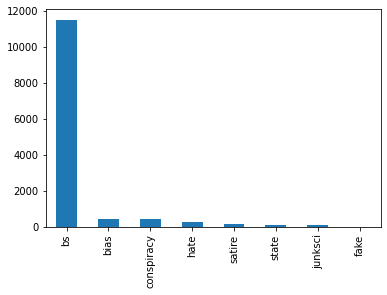

In [5]:
# print the topics being addressed here
fake_news['type'].value_counts().plot(kind="bar")
plt.show()

In [6]:
print(fake_news.describe())
fake_news.head()

       ord_in_thread   domain_rank  ...      comments        shares
count   12999.000000   8776.000000  ...  12999.000000  12999.000000
mean        0.891530  38092.996582  ...      0.038311     10.831833
std         6.486822  26825.487454  ...      0.827335     79.798949
min         0.000000    486.000000  ...      0.000000      0.000000
25%         0.000000  17423.000000  ...      0.000000      0.000000
50%         0.000000  34478.000000  ...      0.000000      0.000000
75%         0.000000  60570.000000  ...      0.000000      0.000000
max       100.000000  98679.000000  ...     65.000000    988.000000

[8 rows x 8 columns]


,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


# **DATA PRE-PROCESSING**

In [7]:
column_names = list(fake_news.columns)
print(column_names)
for column in column_names:
    if fake_news[column].count()<len(fake_news):
        print(column,fake_news[column].count())     
        
fake_news.loc[fake_news['text'].isnull(),'text'] = ''
fake_news.loc[fake_news['country'].isnull(),'country'] = 'US' 
fake_news.loc[fake_news['author'].isnull(),'author'] = fake_news.loc[fake_news['author'].isnull(),'country']
fake_news.loc[fake_news['thread_title'].isnull(),'thread_title'] = ''
fake_news.loc[fake_news['domain_rank'].isnull(),'domain_rank'] = np.nanmedian(np.array(fake_news['domain_rank'])) 

['uuid', 'ord_in_thread', 'author', 'published', 'title', 'text', 'language', 'crawled', 'site_url', 'country', 'domain_rank', 'thread_title', 'spam_score', 'main_img_url', 'replies_count', 'participants_count', 'likes', 'comments', 'shares', 'type']
author 10575
title 12319
text 12953
country 12823
domain_rank 8776
thread_title 12987
main_img_url 9356


In [0]:
pstem = PorterStemmer()
stop = set(stopwords.words('english'))

def stemmer(text):
    wordlist = text.strip().split()
    pstem = PorterStemmer()
    j = '';
    for word in wordlist:
        try:
            j = j+pstem.stem(word)+' '
        except: 
            print(text)
    return j

fake_news['text_lower'] = fake_news['text'].map(lambda x: re.sub(r'[^a-z ]','',x.lower()))
fake_news['text_lower'] = fake_news['text_lower'].map(lambda x: ' '.join([word for word in x.strip().split() if word not in stop ]))
fake_news['text_lower'] = fake_news['text_lower'].map(lambda x: stemmer(x))
fake_news['thread_lower'] = fake_news['thread_title'].map(lambda x: re.sub(r'[^a-z ]','',x.lower()))
fake_news['thread_lower'] = fake_news['thread_lower'].map(lambda x: ' '.join([word for word in x.strip().split() if word not in stop ]))
fake_news['thread_lower'] = fake_news['thread_lower'].map(lambda x: ' '.join([pstem.stem(word) for word in x.strip().split()]))
fake_news['num_words'] = fake_news['text_lower'].map(lambda x: len(str(x).strip().split()))

# **TF-IDF && COSINE SIMILARITY**

In [9]:
def similarity(t1,t2):
    t = [t1,t2]
    tfidf_vectorizer = TfidfVectorizer()
    try:
        vectors = tfidf_vectorizer.fit_transform(t)
        vectors = vectors.toarray()
        sim = cosine_similarity(vectors[0].reshape(1,-1),vectors[1].reshape(1,-1))[0]
    except:
        sim = 0
    return sim

fake_news['similarity'] = [similarity(b['text_lower'],b['thread_lower']) for (a,b) in fake_news.iterrows()]
fake_news['similarity'].describe() 

count    12999.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: similarity, dtype: float64

In [10]:
countries = list(fake_news['country'].unique())
fake_news['country_number'] = fake_news['country'].map(lambda x: countries.index(x))
fake_news['country_number'].describe()

count    12999.000000
mean         1.530348
std          4.034031
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         23.000000
Name: country_number, dtype: float64

In [11]:
languages = list(fake_news['language'].unique())
fake_news['language_number'] = fake_news['language'].map(lambda x: languages.index(x))
fake_news['language_number'].describe()

count    12999.000000
mean         0.206170
std          1.056325
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         15.000000
Name: language_number, dtype: float64

In [12]:
fake_news.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,break weiner cooper fbi hillari email investig,130,0,0,0


In [13]:
fake_news['index'] = fake_news.index
data = fake_news
train_lda = data[['text_lower', 'index','thread_lower']]
train_lda.head(4)

,text_lower,index,thread_lower
0,print pay back money plu interest entir famili...,0,muslim bust stole million govt benefit
1,attorney gener loretta lynch plead fifth barra...,1,attorney gener loretta lynch plead fifth
2,red state fox news sunday report morn anthoni ...,2,break weiner cooper fbi hillari email investig
3,email kayla mueller prison tortur isi chanc re...,3,pin drop speech father daughter kidnap kill is...


In [14]:
processed_docs = train_lda['text_lower'].map(lambda doc: doc.split(" "))
processed_docs[:4]

0    [print, pay, back, money, plu, interest, entir...
1    [attorney, gener, loretta, lynch, plead, fifth...
2    [red, state, fox, news, sunday, report, morn, ...
3    [email, kayla, mueller, prison, tortur, isi, c...
Name: text_lower, dtype: object

## **LDA TOPIC MODELLING**

In [0]:
def get_word_tokens(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) > 3:
            result.append(token)
    return result
tokenized_docs_local = fake_news['text_lower'].map(get_word_tokens)

In [0]:
def get_dictionary_print_words(dataframe,colname):
    dictionary_gensim = gensim.corpora.Dictionary(processed_docs)
    count = 0
    print('######## DICTIONARY Words and occurences ########')
    for k, v in dictionary_gensim.iteritems():
        print(k, v)
        count += 1
        if count > 10:
            break
    dictionary_gensim.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)
    return dictionary_gensim, tokenized_docs_local

In [0]:

def get_bow_corpus_print_sample(dataframe,colname):
    dictionary_gensim, tokenized_docs_local = get_dictionary_print_words(dataframe, colname)
    bow_corpus_local = [dictionary_gensim.doc2bow(doc) for doc in tokenized_docs_local]
    bow_doc_local_0 = bow_corpus_local[0]
    print('\n ######## BOW VECTOR FIRST ITEM ########')
    print(bow_doc_local_0)
    print('\n ######## PREVIEW BOW ########')
    for i in range(len(bow_doc_local_0)):
        print("Word {} (\"{}\") appears {} time.".format(bow_doc_local_0[i][0], 
                                               dictionary_gensim[bow_doc_local_0[i][0]], bow_doc_local_0[i][1]))
    return bow_corpus_local, dictionary_gensim

In [0]:
def get_tfidf_corpus_print_sample(bow_corpus_local):
    from gensim import corpora, models
    tfidf = models.TfidfModel(bow_corpus_local)
    tfidf_corpus_local = tfidf[bow_corpus_local]
    print('\n ######## TFIDF VECTOR FIRST ITEM ########')
    
    from pprint import pprint
    for doc in tfidf_corpus_local:
        pprint(doc)
        break
    return tfidf_corpus_local

In [0]:
def get_lda_model_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model

In [0]:
def get_lda_model_topics_topwords_print_top_topics(bow_corpusforlda,numtopics,dictionaryforlda):
    lda_model = gensim.models.LdaMulticore(bow_corpusforlda, num_topics=numtopics, id2word=dictionaryforlda, passes=2, workers=2, random_state=1)
    lda_all_topics=lda_model.show_topics(num_topics=numtopics, num_words=10,formatted=False)
    lda_topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in lda_all_topics]

    #Below Code Prints Topics and Words
    for topic,words in lda_topics_words:
        print(str(topic)+ "::"+ str(words))
    return lda_model,lda_topics_words

In [0]:
def identify_topic_number_score_label_topwords(text,dictionary_local,lda_model_local,lda_topics_top_words_local):
    bow_vector_local = dictionary_local.doc2bow(get_word_tokens(text))
    topic_number_local, topic_score_local = sorted(
        lda_model_local[bow_vector_local], key=lambda tup: -1*tup[1])[0]
    #print (topic_number_local, topic_score_local)
    return pd.Series([topic_number_local, topic_score_local," ".join(lda_topics_top_words_local[int(topic_number_local)][1])])

In [0]:
def update_lda_results_to_dataset(dataframe,topiccolnames,coltoapplylda,colnamedictionary,colnameldamodel, colnameldatopwords):
    dataframe[topiccolnames] = dataframe.apply(
    lambda row: identify_topic_number_score_label_topwords(
        row[coltoapplylda],colnamedictionary,colnameldamodel,
        colnameldatopwords), axis=1)
    return dataframe

In [23]:
bow_corpus_headline, dictionary_headline = get_bow_corpus_print_sample(fake_news,'text_lower')

######## DICTIONARY Words and occurences ########
0 
1 anoth
2 asap
3 back
4 benefit
5 bust
6 came
7 case
8 commit
9 control
10 deport

 ######## BOW VECTOR FIRST ITEM ########
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (16, 2), (17, 2), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (39, 1), (40, 1)]

 ######## PREVIEW BOW ########
Word 0 ("anoth") appears 1 time.
Word 1 ("asap") appears 1 time.
Word 2 ("back") appears 1 time.
Word 3 ("benefit") appears 1 time.
Word 4 ("bust") appears 1 time.
Word 5 ("came") appears 1 time.
Word 6 ("case") appears 1 time.
Word 7 ("commit") appears 1 time.
Word 8 ("control") appears 1 time.
Word 9 ("deport") appears 1 time.
Word 10 ("entir") appears 1 time.
Word 11 ("everyon") appears 1 time.
Word 12 ("famili") appears 1 time.
Word 13 ("four") appears 1 time.
Word 14

In [24]:
lda_model_headline, lda_headline_topic_words = get_lda_model_topics_topwords_print_top_topics(
    bow_corpus_headline, 10 ,dictionary_headline)

0::['clinton', 'email', 'investig', 'state', 'report', 'hillari', 'comey', 'said', 'time', 'would']
1::['clinton', 'trump', 'hillari', 'presid', 'email', 'would', 'campaign', 'state', 'elect', 'donald']
2::['trump', 'vote', 'elect', 'peopl', 'state', 'clinton', 'democrat', 'american', 'hillari', 'said']
3::['russia', 'state', 'syria', 'would', 'govern', 'presid', 'countri', 'russian', 'said', 'peopl']
4::['govern', 'peopl', 'state', 'would', 'pipelin', 'said', 'american', 'like', 'year', 'time']
5::['russian', 'para', 'email', 'state', 'russia', 'clinton', 'como', 'would', 'said', 'peopl']
6::['like', 'american', 'state', 'make', 'trump', 'peopl', 'time', 'news', 'world', 'media']
7::['state', 'obama', 'govern', 'would', 'peopl', 'year', 'presid', 'world', 'nation', 'american']
8::['peopl', 'world', 'state', 'time', 'like', 'would', 'nation', 'year', 'govern', 'said']
9::['peopl', 'time', 'like', 'year', 'also', 'mani', 'said', 'make', 'world', 'even']


In [25]:
tfidf_corpus_headline = get_tfidf_corpus_print_sample(bow_corpus_headline)


 ######## TFIDF VECTOR FIRST ITEM ########
[(0, 0.08275387447287372),
 (1, 0.34732052969890836),
 (2, 0.07326793123378836),
 (3, 0.146331237598883),
 (4, 0.25694326941888074),
 (5, 0.11662671651052897),
 (6, 0.09549975200972269),
 (7, 0.13631871057630102),
 (8, 0.10015156364799924),
 (9, 0.2379558140945087),
 (10, 0.11149877411061139),
 (11, 0.12770346764229712),
 (12, 0.11049626377938052),
 (13, 0.12894216192330096),
 (14, 0.16855163938296797),
 (16, 0.1459631358268953),
 (17, 0.18387168545296842),
 (18, 0.09728486080549911),
 (19, 0.04477612682794822),
 (20, 0.09446475108984374),
 (21, 0.11242309807054697),
 (22, 0.0991542140769561),
 (23, 0.1610887765005904),
 (24, 0.0722250290867347),
 (25, 0.172930134785294),
 (28, 0.15824510936044836),
 (29, 0.10483182972694496),
 (30, 0.06246753942894103),
 (31, 0.25567781643453247),
 (32, 0.354172583742926),
 (33, 0.1941392224492906),
 (34, 0.2811175996848103),
 (35, 0.06038995036960375),
 (36, 0.21971785906891358),
 (39, 0.157161265715028),
 

In [26]:
lda_tfidf_model_headline  = get_lda_model_print_top_topics(tfidf_corpus_headline,10,dictionary_headline)

0::['email', 'clinton', 'investig', 'comey', 'hillari', 'abedin', 'huma', 'server', 'weiner', 'reopen']
1::['clinton', 'trump', 'hillari', 'email', 'peopl', 'obama', 'campaign', 'foundat', 'like', 'wikileak']
2::['telegram', 'tomb', 'jesu', 'email', 'dotcom', 'irish', 'clinton', 'christ', 'chin', 'comm']
3::['wearechang', 'facebook', 'sourc', 'voltair', 'convers', 'fingerprint', 'bitcoin', 'cannabi', 'moreno', 'proudli']
4::['mosul', 'aleppo', 'syrian', 'iraqi', 'civilian', 'syria', 'terrorist', 'turkey', 'said', 'citi']
5::['trump', 'vote', 'clinton', 'elect', 'russia', 'hillari', 'state', 'russian', 'peopl', 'presid']
6::['pravdaru', 'sich', 'zika', 'nicht', 'dass', 'danney', 'wurd', 'einer', 'mosquito', 'auch']
7::['para', 'como', 'estado', 'president', 'unido', 'todo', 'espaol', 'franai', 'sobr', 'esta']
8::['pipelin', 'dakota', 'protest', 'rock', 'polic', 'stand', 'sioux', 'water', 'protector', 'sheriff']
9::['kelli', 'gingrich', 'trump', 'megyn', 'liar', 'bullshit', 'earnest', 'n

In [0]:
semisupervised_topic_labels = ['topic0','topic1','topic2','topic3','topic4','topic5','topic6','topic7','topic8','topic9']

In [28]:
headlinetopiccolnames = ['topic_number','lda_score','topic_top_words']
fake_newss = update_lda_results_to_dataset(
    fake_news, headlinetopiccolnames,'text_lower', dictionary_headline, lda_model_headline, lda_headline_topic_words)
fake_newss.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,break weiner cooper fbi hillari email investig,130,0,0,0,2,0,0.991962,clinton email investig state report hillari co...
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email kayla mueller prison tortur isi chanc re...,pin drop speech father daughter kidnap kill is...,29,0,0,0,3,1,0.954989,clinton trump hillari presid email would campa...
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,email healthcar reform make america great sinc...,fantast trump point plan reform healthcar begi...,196,0,0,0,4,2,0.525675,trump vote elect peopl state clinton democrat ...


In [29]:
train_data, validate_data, test_data = np.split(fake_newss.sample(frac=1), [int(.6*len(fake_newss)), int(.8*len(fake_newss))])

train_data = train_data.reset_index(drop=True)
validate_data = validate_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)


print("Size of training set: {}".format(len(train_data)))
print("Size of validation set: {}".format(len(validate_data)))
print("Size of testing set: {}".format(len(test_data)))

Size of training set: 7799
Size of validation set: 2600
Size of testing set: 2600


In [30]:
train_data.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,0c38238ac82edb1f39f9fdf31d12613268e457f5,0,RT,2016-10-31T20:18:00.316+02:00,Poll: 50% of Russians fear US-Syria-Russia sta...,Videos Poll: 50% of Russians fear US-Syria-Rus...,english,2016-10-31T20:18:00.316+02:00,mintpressnews.com,US,68691.0,Poll: 50% of Russians fear US-Syria-Russia sta...,0.0,http://www.mintpressnews.com/wp-content/upload...,0,1,0,0,0,bs,video poll russian fear ussyriarussia standoff...,poll russian fear ussyriarussia standoff could...,292,0,0,0,6127,3,0.827813,russia state syria would govern presid countri...
1,913c88af98c09f0e91720f95eb8992a75657fb6b,0,Starkman,2016-11-05T04:47:04.854+02:00,Gaddafi’s Last Words While Begging For Mercy: ...,Almost six years have passed since the death o...,english,2016-11-05T04:47:04.854+02:00,topinfopost.com,US,34478.0,Gaddafi’s Last Words While Begging For Mercy: ...,0.0,NaN,0,1,0,0,0,bs,almost six year pass sinc death colonel muamma...,gaddafi last word beg merci,314,0,0,0,10807,3,0.487537,russia state syria would govern presid countri...
2,9b0623b5edcff16fe6931ac208b83124ab389bf2,0,US,2016-10-27T19:08:02.943+03:00,Putin: Russia is not going to attack anyone,Putin: Russia is not going to attack anyone ...,english,2016-10-27T19:08:02.943+03:00,pravdareport.com,US,75353.0,Putin: Russia is not going to attack anyone,0.0,http://pravda-team.ru/eng/image/article/1/3/2/...,0,0,0,0,0,bs,putin russia go attack anyon pravdaru russia g...,putin russia go attack anyon,146,0,0,0,7394,3,0.993180,russia state syria would govern presid countri...


In [0]:
# train_data['type']=pd.factorize(train_data['type'])[0]

In [0]:
# smote = SMOTE(sampling_strategy='auto')
# train_data = smote.fit_sample(train_data.drop(['type'],axis=1),train_data['type'])

In [33]:
fake_newss.head(3)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,red state fox news sunday report morn anthoni ...,break weiner cooper fbi hillari email investig,130,0,0,0,2,0,0.991962,clinton email investig state report hillari co...


In [0]:
# x = fake_newss.drop(['type'],axis=1)
# y=fake_news['type']
# smote = SMOTE(sampling_strategy='auto')
# x_train,y_train = smote.fit_sample(x_train,y_train)

In [35]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


## --------------------------------------------------------------------------------------------------------------------------------------------------------------

## Social Credibility - Shreyus

In [0]:
x = fake_newss[['likes','comments','shares','participants_count']]
y=fake_news['type']

In [0]:
y= pd.factorize(y)[0]

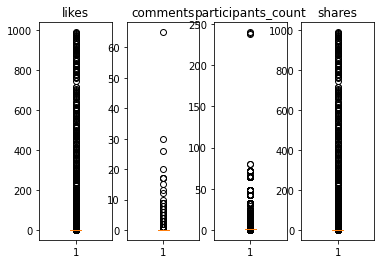

In [38]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=4)
axes[0].boxplot(x['likes'])
axes[0].set_title('likes')
axes[1].boxplot(x['comments'])
axes[1].set_title('comments')
axes[2].boxplot(x['participants_count'])
axes[2].set_title('participants_count')
axes[3].boxplot(x['shares'])
axes[3].set_title('shares')

fig.savefig("boxplots.png")

In [0]:
num=['likes','comments','shares','participants_count']

In [40]:
maxs=[]
mins=[]
stds=[]
means=[]
for x1 in range(len(num)):
  maxs.append(x[num[x1]].max())
  mins.append(x[num[x1]].min())
  stds.append(x[num[x1]].std())
  means.append(x[num[x1]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,likes,988,0,79.798949,10.831833
1,comments,65,0,0.827335,0.038311
2,shares,988,0,79.798949,10.831833
3,participants_count,240,0,6.884239,1.727518


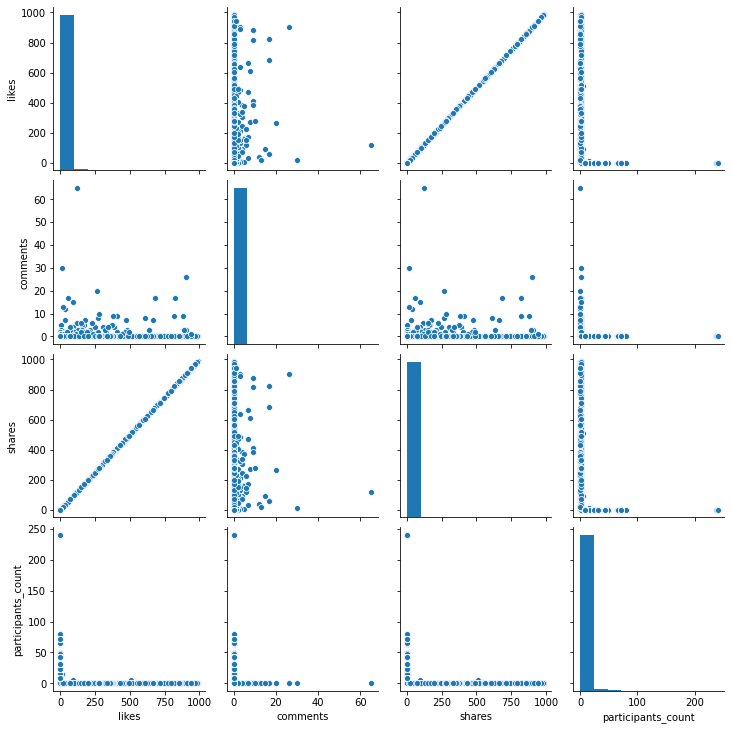

In [41]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [42]:
# correlation plots for numerical features
corr = x[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [0]:
x_train_soc ,x_test_soc,y_train_soc,y_test_soc = train_test_split(x,y,test_size=0.3)

### SVM

In [0]:
from sklearn import svm
def shr_linearsvmclf(X_train, y_train, X_test, y_test): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC()
    lin_svc.fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_svm=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

### NAIVE BAYES

In [0]:
# NAIVE BAYES CLASSIFIER
def shr_naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_nb=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

### RANDOM FOREST

In [0]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
def shr_randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestRegressor().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_rf=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

### XG BOOST

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def shr_xgboost(X_train, y_train,X_test, y_test):

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test)

  f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,y_pred.round())
  #shreyus_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)
  return accuracy


In [0]:
 # XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def shr_social_credibility_score(sample):
  x_sample = sample[['likes','comments','shares','participants_count']]
  y_sample=sample['type']
  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(x_train_soc,y_train_soc)

  y_pred = xg.predict(x_sample)

  
  accuracy = accuracy_score(y_sample,y_pred.round())
  #shreyus_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)
  predicedProb = 1- xg.predict_proba(x_sample)[:,1]
  return predicedProb

### KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def shr_knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #shreyus_knn=round(accuracy_score(y_test, y_hat.round())*100,2)
    return ({'f1score':f1score,'ACCURACY':accuracy})

In [50]:
shr_linearsvmclf(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

LinearSVC


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'ACCURACY': 0.8853846153846154, 'f1score': 0.8409618947196705}

In [51]:
shr_naive_bayes(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

GaussianNB


{'ACCURACY': 0.06282051282051282, 'f1score': 0.0674204857126117}

In [52]:
shr_randomforest(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

RandomForestClassifier


{'ACCURACY': 0.8753846153846154, 'f1score': 0.8422540444476878}

In [53]:
shr_xgboost(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

XG Boost algorithm


0.8902564102564102

In [54]:
shr_knn(x_train_soc,y_train_soc,x_test_soc,y_test_soc)

KNeighborsClassifier


{'ACCURACY': 0.8848717948717949, 'f1score': 0.8471702474633481}

## --------------------------------------------------------------------------------------------------------------------------------------------------------------

# CREDIBILITY AND REALIABILITY ------ SHAILESHA 

In [55]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


In [0]:
x = fake_newss[['domain_rank','replies_count','participants_count']]
y=fake_news['type']

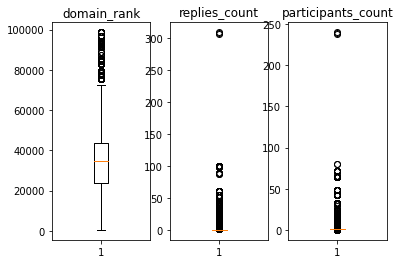

In [57]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(x['domain_rank'])
axes[0].set_title('domain_rank')
axes[1].boxplot(x['replies_count'])
axes[1].set_title('replies_count')
axes[2].boxplot(x['participants_count'])
axes[2].set_title('participants_count')


fig.savefig("boxplots.png")

In [0]:
num=['domain_rank','replies_count','participants_count']

In [59]:
maxs=[]
mins=[]
stds=[]
means=[]
for x1 in range(len(num)):
  maxs.append(x[num[x1]].max())
  mins.append(x[num[x1]].min())
  stds.append(x[num[x1]].std())
  means.append(x[num[x1]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,domain_rank,98679.000000,486.000000,22106.012346,36918.588507
1,replies_count,309.000000,0.000000,9.656838,1.383183
2,participants_count,240.000000,0.000000,6.884239,1.727518


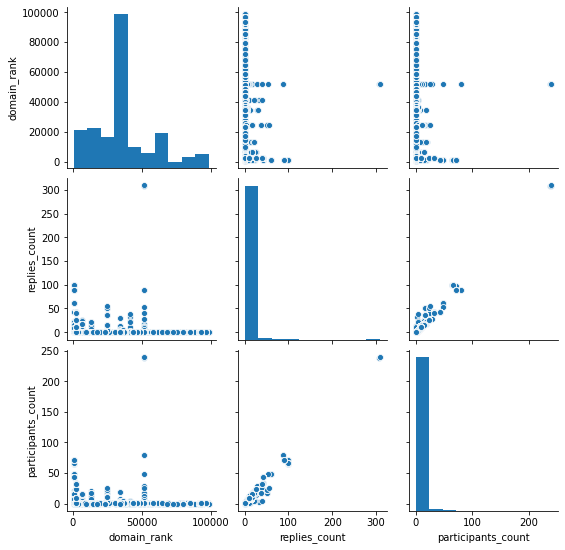

In [60]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [61]:
# correlation plots for numerical features
corr = x[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [0]:
y= pd.factorize(y)[0]

In [0]:
x_train_cred ,x_test_cred,y_train_cred,y_test_cred = train_test_split(x,y,test_size=0.3)

## SVM

In [0]:
from sklearn import svm
def sha_linearsvmclf(X_train, y_train, X_test, y_test): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC()
    lin_svc.fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_svm=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## NAIVE BAYES

In [0]:
# NAIVE BAYES CLASSIFIER
def sha_naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_nb=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## RANDOM FOREST

In [0]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
def sha_randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestRegressor().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_rf=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sha_xgboost(X_train, y_train,X_test, y_test):

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test)

  f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,y_pred.round())
  #sai_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)

  return accuracy

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sha_reliability_score(sample):

  x_sample=sample[['domain_rank','replies_count','participants_count']]
  y_sample=sample['type']
  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(x_train_cred,y_train_cred)

  y_pred = xg.predict(x_sample)


  accuracy = accuracy_score(y_sample,y_pred.round())
  #sai_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)
  
  predicedProb =1- xg.predict_proba(x_sample)[:,1]
  return predicedProb

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def sha_knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sai_knn=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [70]:
x_test_cred.shape

(3900, 3)

In [71]:
sha_linearsvmclf(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

LinearSVC


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'ACCURACY': 0.02846153846153846, 'f1score': 0.05056079527286202}

In [72]:
sha_naive_bayes(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

GaussianNB


{'ACCURACY': 0.31846153846153846, 'f1score': 0.4334142584281443}

In [73]:
sha_randomforest(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

RandomForestClassifier


{'ACCURACY': 0.9864102564102564, 'f1score': 0.9852136889356613}

In [74]:
sha_xgboost(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

XG Boost algorithm


0.9866666666666667

In [75]:
sha_knn(x_train_cred ,y_train_cred,x_test_cred,y_test_cred)

KNeighborsClassifier


{'ACCURACY': 0.9869230769230769, 'f1score': 0.985594541471343}

## --------------------------------------------------------------------------------------------------------------------------------------------------------------

# NAIVE REALISM ------ SRILALITHA

In [76]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


In [0]:
x = fake_newss[['lda_score','spam_score','domain_rank']]
y=fake_news['type']

In [0]:
y= pd.factorize(y)[0]

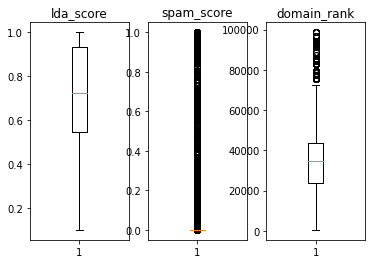

In [79]:
# Boxplots for continuous attributes
fig, axes = plt.subplots(nrows=1, ncols=3)
axes[0].boxplot(x['lda_score'])
axes[0].set_title('lda_score')
axes[1].boxplot(x['spam_score'])
axes[1].set_title('spam_score')
axes[2].boxplot(x['domain_rank'])
axes[2].set_title('domain_rank')


fig.savefig("boxplots.png")

In [0]:
num=['lda_score','spam_score','domain_rank']

In [81]:
maxs=[]
mins=[]
stds=[]
means=[]
for x1 in range(len(num)):
  maxs.append(x[num[x1]].max())
  mins.append(x[num[x1]].min())
  stds.append(x[num[x1]].std())
  means.append(x[num[x1]].mean())
cm = sns.light_palette("orange", as_cmap=True)
describe=pd.DataFrame({'columns':num,'max':maxs,'min':mins,'std':stds,'mean':means})
describe.style.background_gradient(cmap=cm)

,columns,max,min,std,mean
0,lda_score,0.999692,0.100000,0.220710,0.717286
1,spam_score,1.000000,0.000000,0.122889,0.026122
2,domain_rank,98679.000000,486.000000,22106.012346,36918.588507


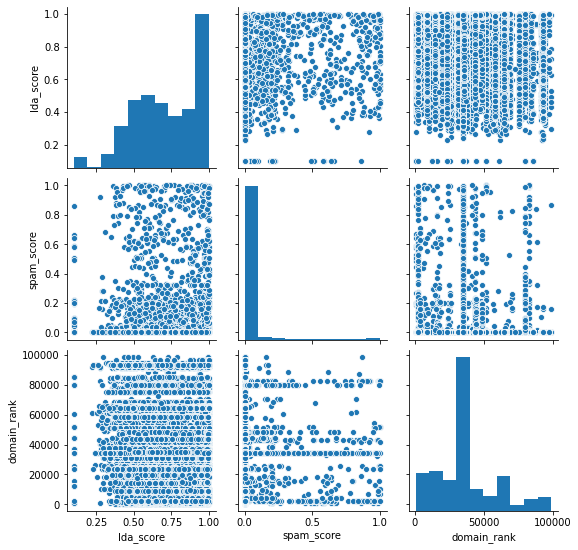

In [82]:
# Data distribution plots by every feature by feature
sns.pairplot(x[num])

In [83]:
# correlation plots for numerical features
corr = x[num].corr()
arr_corr = corr.values
arr_corr = np.around(arr_corr, decimals=2)

columns = corr.columns.values.tolist()

fig = ff.create_annotated_heatmap(arr_corr, x=columns, y=columns, colorscale='Reds')

fig.layout.title = 'Pearson Correlation <br> (What Determines Risk in Loans?)'
fig.show()

In [0]:
x_train_nr ,x_test_nr,y_train_nr,y_test_nr = train_test_split(x,y,test_size=0.3)

## SVM

In [0]:
from sklearn import svm
def sri_linearsvmclf(X_train, y_train, X_test, y_test): 
    print("LinearSVC")
    lin_svc = svm.LinearSVC()
    lin_svc.fit(X_train, y_train)

    y_pred = lin_svc.predict(X_test)
    
    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())

    #sri_svm=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## NAIVE BAYES

In [0]:
# NAIVE BAYES CLASSIFIER
def sri_naive_bayes(X_train, y_train, X_test, y_test):  
    print("GaussianNB")
    naive = GaussianNB().fit(X_train, y_train)

    y_pred = naive.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())

    #sri_nb=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

## RANDOM FOREST

In [0]:
# RANDOM FOREST CLASSIFIER
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
def sri_randomforest(X_train, y_train,X_test, y_test):
    print("RandomForestClassifier")
    randomforest = RandomForestRegressor().fit(X_train, y_train)

    y_pred = randomforest.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())

    #sri_rf=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sri_xgboost(X_train, y_train,X_test, y_test):

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  xg=xg.fit(X_train,y_train)

  y_pred = xg.predict(X_test)

  f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,y_pred.round())

  #sri_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)

  return accuracy

In [0]:
# XG BOOST CLASSIFIER
from xgboost import XGBClassifier
def sri_naive_realism_score(sample):
  print("setting features:")
  x_sample=sample[['lda_score','spam_score','domain_rank']]
  print("setting target:")
  y_sample=sample['type']

  print("XG Boost algorithm")
  xg = XGBClassifier(random_state=2)
  print("Fitting XG Boost algorithm")
  xg=xg.fit(x_train_nr,y_train_nr)
  print("Predicting XG Boost algorithm")
  y_pred = xg.predict(x_sample)
  print("Accuracy XG Boost algorithm")
  
  accuracy = accuracy_score(y_sample,y_pred.round())
  predicedProb =1- xg.predict_proba(x_sample)[:,1]
  print (accuracy)
  print (predicedProb)
  #sri_xgb=round(accuracy_score(y_test, y_hat.round())*100,2)

  return predicedProb

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def sri_knn(X_train, y_train, X_test, y_test):  
    print("KNeighborsClassifier")
    knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    f1score = f1_score(y_test, y_pred.round(), zero_division=1,average='weighted')
    accuracy = accuracy_score(y_test,y_pred.round())
    #sri_knn=round(accuracy_score(y_test, y_hat.round())*100,2)

    return ({'f1score':f1score,'ACCURACY':accuracy})

In [91]:
sri_linearsvmclf(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

LinearSVC


/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



{'ACCURACY': 0.050512820512820515, 'f1score': 0.08112464372096806}

In [92]:
sri_naive_bayes(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

GaussianNB


{'ACCURACY': 0.8874358974358975, 'f1score': 0.8345104309266788}

In [93]:
sri_randomforest(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

RandomForestClassifier


{'ACCURACY': 0.9646153846153847, 'f1score': 0.9713078482631322}

In [94]:
sri_xgboost(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

XG Boost algorithm


0.9830769230769231

In [95]:
sri_knn(x_train_nr ,y_train_nr,x_test_nr,y_test_nr)

KNeighborsClassifier


{'ACCURACY': 0.9802564102564103, 'f1score': 0.9786698627909043}

## --------------------------------------------------------------------------------------------------------------------------------------------------------------

# BIAS ------ ATUL SHAH

In [96]:
fake_newss.head(2)

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,text_lower,thread_lower,num_words,similarity,country_number,language_number,index,topic_number,lda_score,topic_top_words
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,print pay back money plu interest entir famili...,muslim bust stole million govt benefit,46,0,0,0,0,7,0.492957,state obama govern would peopl year presid wor...
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.0,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,attorney gener loretta lynch plead fifth barra...,attorney gener loretta lynch plead fifth,164,0,0,0,1,0,0.949275,clinton email investig state report hillari co...


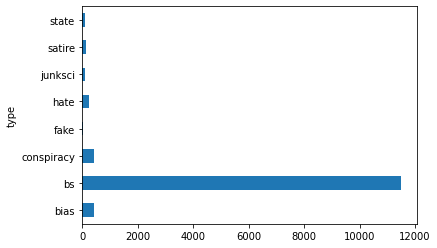

In [97]:
fake_newss.groupby(['type']).size().plot(kind='barh')

In [98]:
from nltk.corpus import stopwords
import string
import nltk
nltk.download('punkt')

fake_news = fake_newss[fake_newss["type"] == "fake"]

# Join the title and text
all_text = fake_news.title.str.cat(fake_news.text, sep=' ')

# Tokenize. The NLTK tokenizer isn't awesome. Spacy has a nice one, but I don't think it is installed
words = nltk.word_tokenize(" ".join(all_text.tolist()))

# clearly more cleaning is needed here, but really I should get a better tokenizer
stop = stopwords.words('english') 
cleanwords = [i for i in words if i not in stop and i.isalpha() and len(i) > 2]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


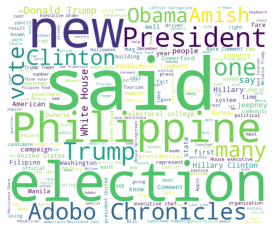

In [99]:
from wordcloud import WordCloud, STOPWORDS

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cleanwords))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

In [0]:
bigrams = nltk.bigrams(cleanwords)

In [101]:
# look at the most common. 

from collections import Counter
counter = Counter(bigrams)
print(counter.most_common(10))

[(('The', 'Adobo'), 20), (('Adobo', 'Chronicles'), 20), (('Donald', 'Trump'), 16), (('White', 'House'), 15), (('Hillary', 'Clinton'), 13), (('electoral', 'college'), 10), (('United', 'States'), 9), (('The', 'Resistance'), 8), (('Rate', 'Comment'), 7), (('adobochron', 'Comment'), 6)]


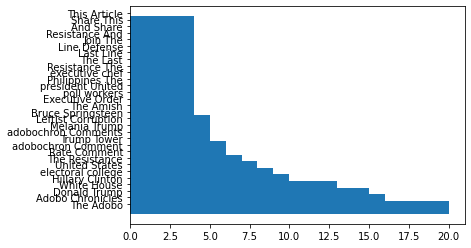

In [102]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

#plt.bar(indexes, values, width)
#plt.xticks(indexes + width * 0.5, labels, rotation=90)

plt.barh(indexes, values, width)
plt.yticks(indexes + width, labels)
plt.show()

In [0]:

x = fake_newss['text_lower']
y=fake_newss['type']

In [0]:
y= pd.factorize(y)[0]

In [0]:
x_train_bias ,x_test_bias,y_train_bias,y_test_bias = train_test_split(x,y,test_size=0.3)

### SVM

In [0]:
def atul_svm(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LinearSVC())])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  
  return ({'f1score':f1score,'ACCURACY':accuracy})

### NAIVE BAYES

In [0]:
def atul_nb(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  
  return ({'f1score':f1score,'ACCURACY':accuracy})

### XG BOOST

In [0]:

def atul_xgb(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])
  model = pipe.fit(x_train_bias, y_train_bias)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  
  return accuracy


In [0]:
def atul_bias_score(sample):

   x_sample=sample['text_lower']
   y_sample=sample['type']
  


   pipe = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('model', XGBClassifier(loss = 'deviance',
                                                    learning_rate = 0.01,
                                                    n_estimators = 10,
                                                    max_depth = 5,
                                                    random_state=2020))])
   model = pipe.fit(x_train_bias, y_train_bias)
   
   prediction = model.predict(x_sample)
   

   #accuracy = accuracy_score(y_sample.values,prediction.round())   
   predicedProb = model.predict_proba(x_sample)[:,1]

   return predicedProb
 

### RANDOM FOREST

In [0]:
def atul_rf(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  # atul_svm=round(accuracy_score(y_test, prediction)*100,2)
  return ({'f1score':f1score,'ACCURACY':accuracy})

### KNN

In [0]:
def atul_knn(x_train,y_train,x_test,y_test):

  pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', KNeighborsClassifier(n_neighbors = 10,weights = 'distance',algorithm = 'brute'))])
  model = pipe.fit(x_train, y_train)
  prediction = model.predict(x_test)
  print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
  f1score = f1_score(y_test, prediction.round(), zero_division=1,average='weighted')
  accuracy = accuracy_score(y_test,prediction.round())
  # atul_svm=round(accuracy_score(y_test, prediction)*100,2)
  
  return ({'f1score':f1score,'ACCURACY':accuracy})

In [112]:
atul_svm(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 90.03%


{'ACCURACY': 0.9002564102564102, 'f1score': 0.8702230135551731}

In [113]:
atul_nb(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 87.92%


{'ACCURACY': 0.8792307692307693, 'f1score': 0.822726786107875}

In [114]:
atul_xgb(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 89.79%


0.897948717948718

In [115]:
atul_rf(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 89.67%


{'ACCURACY': 0.8966666666666666, 'f1score': 0.8620725043024122}

In [116]:
atul_knn(x_train_bias ,y_train_bias,x_test_bias,y_test_bias)

accuracy: 88.54%


{'ACCURACY': 0.8853846153846154, 'f1score': 0.841979807433479}

## **FINAL COMBINED MODEL**

In [0]:
x_combined = fake_newss[['domain_rank','replies_count','participants_count','likes','comments','shares','text_lower','lda_score','spam_score']]

y_combined=fake_newss['type']

In [0]:
y_combined= pd.DataFrame(pd.factorize(y_combined)[0],columns=['type'])

In [0]:
data_combined=pd.concat([x_combined, y_combined], axis=1)

###Preparing a sample record for validation

In [0]:
sample=data_combined.iloc[0:1]


In [121]:
sample

,domain_rank,replies_count,participants_count,likes,comments,shares,text_lower,lda_score,spam_score,type
0,25689.0,0,1,0,0,0,print pay back money plu interest entir famili...,0.492957,0.0,0


In [0]:
def getNewsType(sample):

     accuracy_atul=atul_xgb(x_train_bias,y_train_bias,x_test_bias,y_test_bias)
     accuracy_sha=sha_xgboost(x_train_cred,y_train_cred,x_test_cred,y_test_cred)
     accuracy_shreyus=shr_xgboost(x_train_soc,y_train_soc,x_test_soc,y_test_soc)
     accuracy_sri=sri_xgboost(x_train_nr,y_train_nr,x_test_nr,y_test_nr)
     accur=[accuracy_atul,accuracy_sha,accuracy_shreyus,accuracy_sri]
  
     w = [float(i)/sum(accur) for i in accur]
     print(w)
     sumW = 0
     prob = []
     
     prob.append(w[0] * atul_bias_score(sample))
     
     prob.append(w[1] * sha_reliability_score(sample))
     sumW += w[1]
     prob.append(w[2] * shr_social_credibility_score(sample))
     sumW += w[2]
     prob.append(w[3] * sri_naive_realism_score(sample))
     sumW += w[3]

     probTotal = sum(prob[0:len(prob)]) / sumW
     return probTotal
    
 

In [131]:
result = getNewsType(sample)


 

accuracy: 89.79%
XG Boost algorithm
XG Boost algorithm
XG Boost algorithm
[0.23894650655021837, 0.26255458515283847, 0.2368995633187773, 0.26159934497816595]
XG Boost algorithm
XG Boost algorithm
setting features:
setting target:
XG Boost algorithm
Fitting XG Boost algorithm
Predicting XG Boost algorithm
Accuracy XG Boost algorithm
1.0
[0.9995227]


# Fake news category is determined with the confidence of 99% accuracy.